In [1]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
print('Máy tính đang xử lí ảnh....')
from numpy import asarray

folder = '/content/drive/MyDrive/nhandienkhuonmat/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('HOANG'):
    output = 0
  if file.startswith('LAM'):
    output = 1
  if file.startswith('LINH'):
    output = 2
  if file.startswith('NHAT'):
    output = 3
  if file.startswith('PHONG'):
    output = 4
  if file.startswith('QUY'):
    output = 5
  if file.startswith('QUYET'):
    output = 6
  if file.startswith('THAOHUNG'):
    output = 7
  if file.startswith('THOA'):
    output = 8
  if file.startswith('ToanQuan'):
    output = 9
  if file.startswith('TUAN'):
    output = 10
  if file.startswith('TUNG'):
    output = 11
  if file.startswith('VIET'):
    output = 12
  if file.startswith('VU'):
    output = 13
  photo = load_img(folder + file, target_size=(40,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

# Save image data and labels to numpy arrays
save('/content/drive/MyDrive/nhandienkhuonmat/Faces_photos.npy', photos)
save('/content/drive/MyDrive/nhandienkhuonmat/Faces_labels.npy', labels)

Máy tính đang xử lí ảnh....
(418, 40, 40, 3) (418,)


In [12]:
# Load images and labels
from keras.utils import to_categorical
#one hot encoding
photos = np.load('/content/drive/MyDrive/nhandienkhuonmat/Faces_photos.npy')
labels = np.load('/content/drive/MyDrive/nhandienkhuonmat/Faces_labels.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [14]:
#Build Model
model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape = (40,40,3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation= 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 40, 40, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 64)       

In [15]:
#increase data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [17]:
print('Máy tính đang training...')
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),
                               epochs=100)
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Máy tính đang training...
Epoch 1/100


<ipython-input-17-957a6dffd752>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),


5/5 [==============================] - 3s 348ms/step - loss: 0.5502 - accuracy: 0.8938
Epoch 2/100
5/5 [==============================] - 2s 358ms/step - loss: 0.1803 - accuracy: 0.9349
Epoch 3/100
5/5 [==============================] - 2s 342ms/step - loss: 0.1982 - accuracy: 0.9178
Epoch 4/100
5/5 [==============================] - 2s 333ms/step - loss: 0.1910 - accuracy: 0.9521
Epoch 5/100
5/5 [==============================] - 3s 551ms/step - loss: 0.1330 - accuracy: 0.9658
Epoch 6/100
5/5 [==============================] - 3s 599ms/step - loss: 0.1055 - accuracy: 0.9726
Epoch 7/100
5/5 [==============================] - 2s 347ms/step - loss: 0.0882 - accuracy: 0.9760
Epoch 8/100
5/5 [==============================] - 2s 391ms/step - loss: 0.0721 - accuracy: 0.9863
Epoch 9/100
5/5 [==============================] - 2s 336ms/step - loss: 0.0770 - accuracy: 0.9726
Epoch 10/100
5/5 [==============================] - 2s 329ms/step - loss: 0.1063 - accuracy: 0.9589
Epoch 11/100
5/5 [===

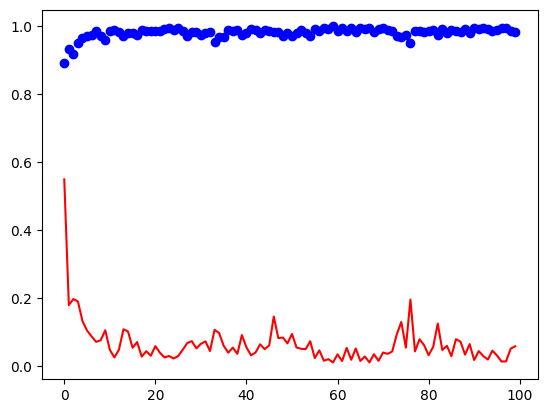

In [18]:
#Watching charts
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [19]:
model.save('/content/drive/MyDrive/nhandienkhuonmat/Faces.h5')

In [20]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/nhandienkhuonmat/Faces.h5')

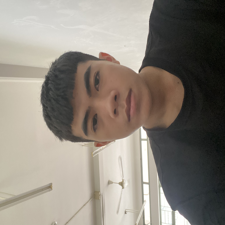

1/1 [==============================] - 0s 23ms/step
['VU']


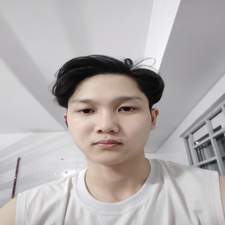

1/1 [==============================] - 0s 24ms/step
['LAM']


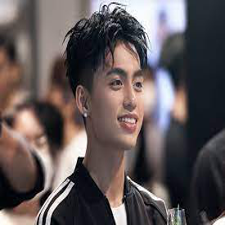

1/1 [==============================] - 0s 33ms/step
['HOANG']


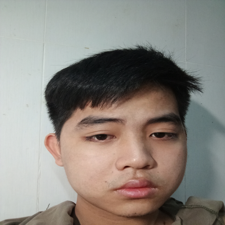

1/1 [==============================] - 0s 24ms/step
['HOANG']


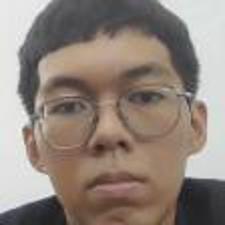

1/1 [==============================] - 0s 25ms/step
['NHAT']


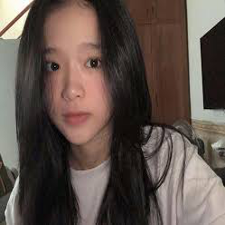

1/1 [==============================] - 0s 29ms/step
['TUNG']


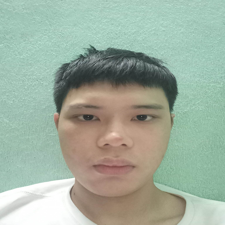

1/1 [==============================] - 0s 25ms/step
['ToanQuan']


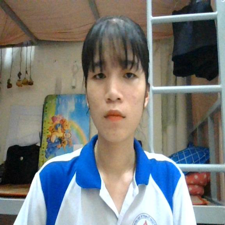

1/1 [==============================] - 0s 27ms/step
['THOA']


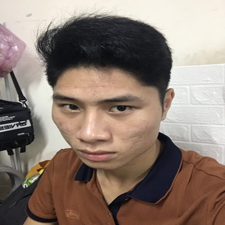

1/1 [==============================] - 0s 24ms/step
['QUYET']


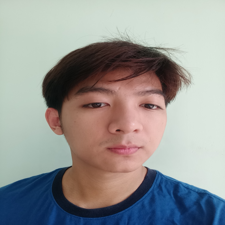

1/1 [==============================] - 0s 25ms/step
['VIET']


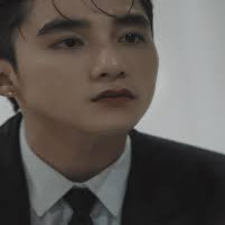

1/1 [==============================] - 0s 26ms/step
['NHAT']


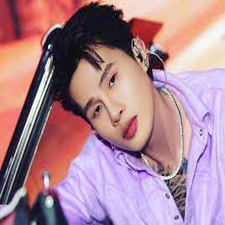

1/1 [==============================] - 0s 25ms/step
['TUAN']


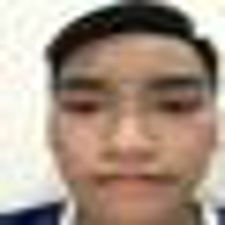

1/1 [==============================] - 0s 26ms/step
['THAOHUNG']


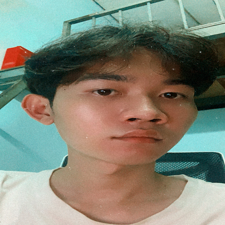

1/1 [==============================] - 0s 25ms/step
['QUY']


In [24]:
from PIL import Image
import numpy as np
import os

#Create array to save label
label = np.array(['HOANG', 'LAM', 'LINH', 'NHAT', 'PHONG', 'QUY',
         'QUYET', 'THAOHUNG', 'THOA', 'ToanQuan', 'TUAN',
         'TUNG', 'VIET', 'VU'])

# New size of photo
new_size = (225, 225)
predict_size = (40, 40)

# The path to the folder containing the photos in Drive
path = '/content/drive/MyDrive/nhandienkhuonmat/checking data faces/'
images = os.listdir(path)

# Read photos from folders on Drive and display them on Colab
for image_name in images:
    # Path to image file
    img_path = os.path.join(path, image_name)
    # Read pictures
    if os.path.isfile(img_path):
      # Read pictures
      img = Image.open(img_path)
      img_origin = Image.open(img_path)

      # Resize photo to new size
      img_origin = img.resize(new_size)
      img_origin.show()

      #Forecast
      img = img.resize(predict_size)
      img = img_to_array(img)
      img = img.reshape(1,40,40,3)
      img = img.astype('float32')/255
      max = np.argmax(model.predict(img), axis = 1)
      print(label[max])